In [2]:
%config IPCompleter.greedy = True
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np

# Regularisation Introduction



In [3]:
# Setup an example dataset
from sklearn.model_selection import train_test_split
n_samples, n_features = 14, 1
np.random.seed(5)
X = np.random.random_sample(n_samples) * 2 * np.pi - np.pi
X = X.reshape((-1,1))
y = np.sin(X) + (np.random.random_sample(n_samples)*0.1).reshape((-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

x_i = np.linspace(-np.pi, np.pi, 200)
x_i = x_i.reshape((-1, 1))
y_i = np.sin(x_i)
print('{} Training samples'.format(X_train.shape[0]))
print('{} Testing samples'.format(X_test.shape[0]))

9 Training samples
5 Testing samples


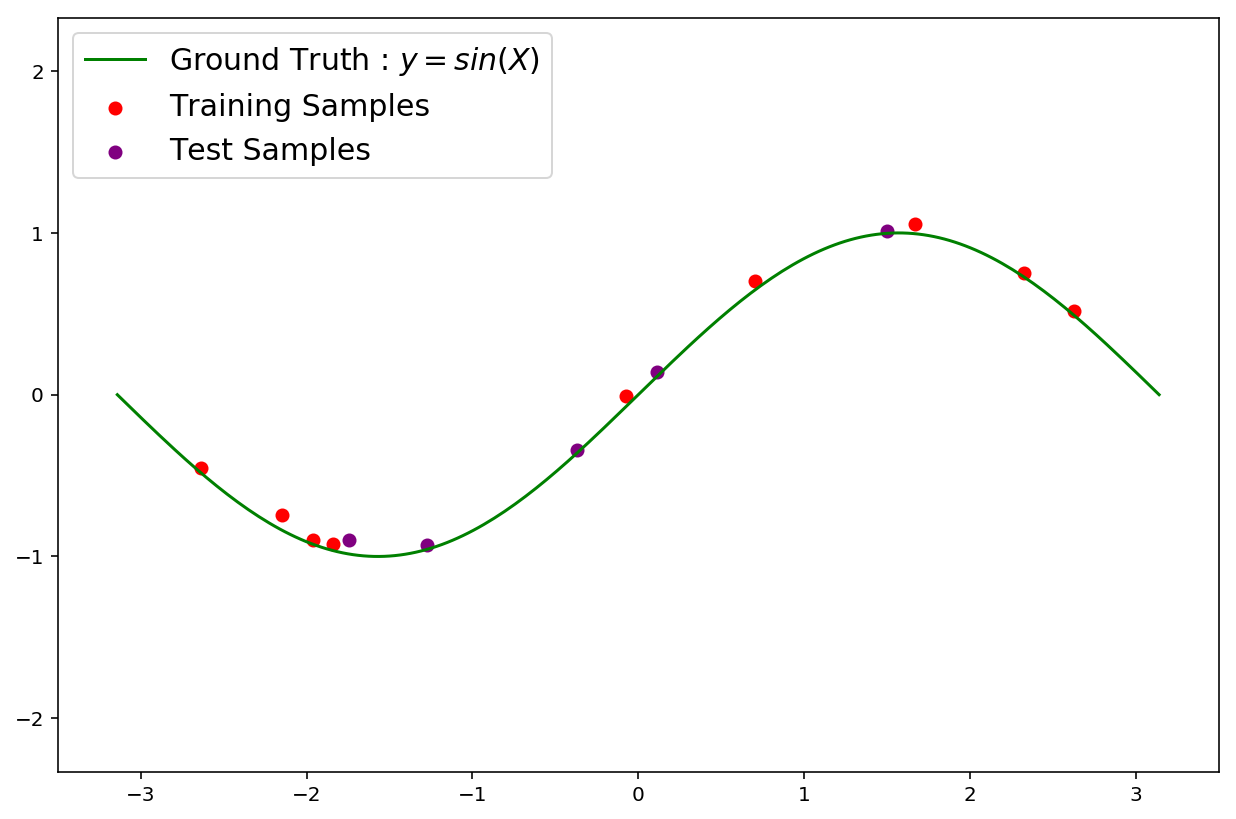

In [4]:
scale_factor = 0.65
plt.figure(figsize=(16*scale_factor,10.667*scale_factor))
plt.axis([-3.5,3.5,-2.33,2.33])
plt.plot(x_i, y_i, c='green', label='Ground Truth : $y=sin(X)$')
plt.scatter(X_train, y_train, c='red', label='Training Samples')
plt.scatter(X_test, y_test, c='purple', label='Test Samples')
plt.legend(loc="upper left", fontsize=15)

$$ y=sin(X)$$

## Ridge regression

Linear weights, with polynomial mapping of the input to the feature vector
$$ \phi(x)=[x^{0},x^{1},\dots,x^{M}]$$
$$ y(x,\mathbf{w})=w_{0}+w_{1}x+w_{2}x^{2}+\dots+w_{M}x^{M}=\sum_{j=0}^{M} w_{j}x^{j}=\phi(x)\mathbf{w}$$
$M=$ order of the polynomial

$$ J(w)= \sum_i (y(x_{i},\mathbf{w}) - y_i)^2 $$

In [5]:
from sklearn.kernel_ridge import KernelRidge

clf = KernelRidge(degree=2, kernel='poly', alpha=0)
clf.fit(X_train, y_train)

/Users/samholt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


KernelRidge(alpha=0, coef0=1, degree=2, gamma=None, kernel='poly',
      kernel_params=None)

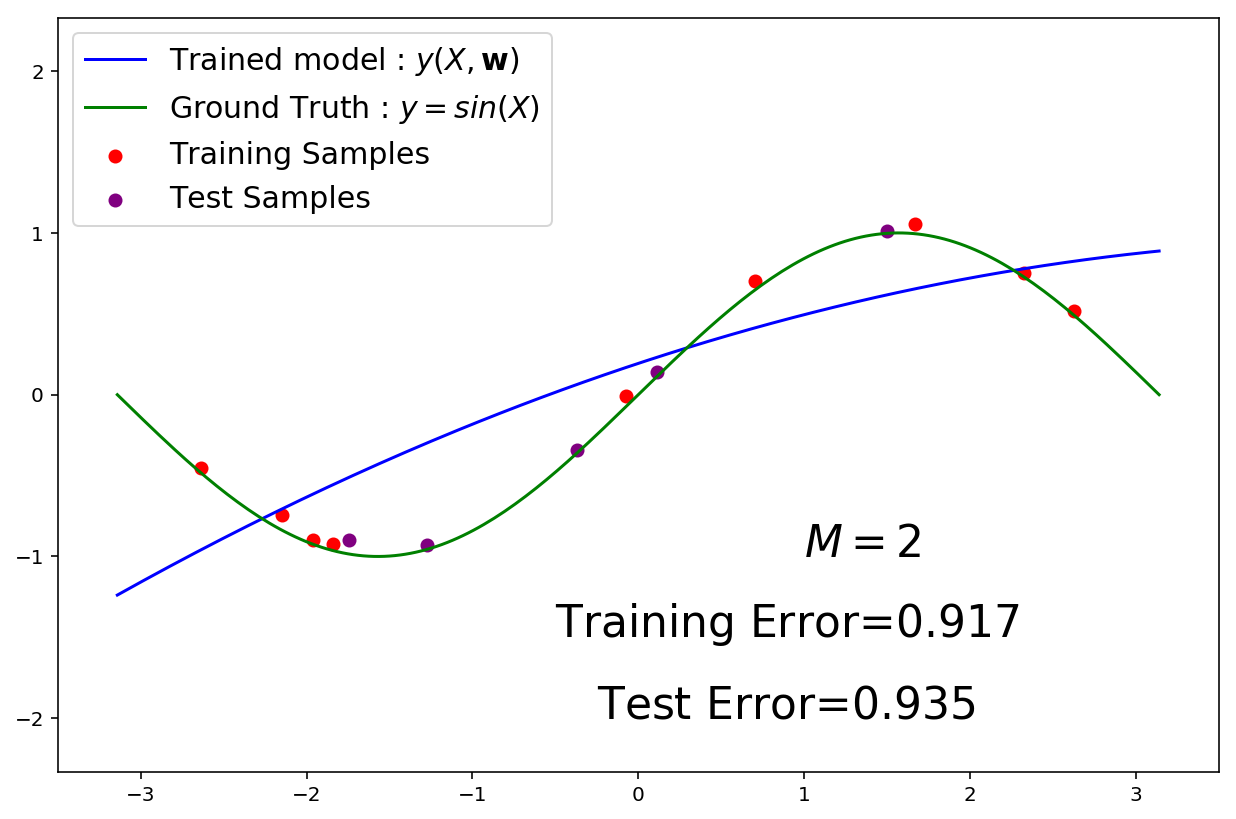

In [6]:
from numpy import linalg as LA

error_train = LA.norm(clf.predict(X_train)-y_train, 'fro')
error_test = LA.norm(clf.predict(X_test)-y_test, 'fro')

plt.figure(figsize=(16*scale_factor,10.667*scale_factor))
plt.axis([-3.5,3.5,-2.33,2.33])
plt.plot(x_i, clf.predict(x_i), c='blue', label='Trained model : $y(X,\mathbf{w})$')
plt.plot(x_i, y_i, c='green', label='Ground Truth : $y=sin(X)$')
plt.scatter(X_train, y_train, c='red', label='Training Samples')
plt.scatter(X_test, y_test, c='purple', label='Test Samples')
plt.text(1,-1,'$M=2$',fontsize=22)
plt.text(-0.5,-1.5,'Training Error=${0:.3f}$'.format(error_train), fontsize=22)
plt.text(-0.25,-2.0,'Test Error=${0:.3f}$'.format(error_test), fontsize=22)
plt.legend(loc="upper left", fontsize=15)

/Users/samholt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/samholt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/samholt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/samholt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/samholt/a

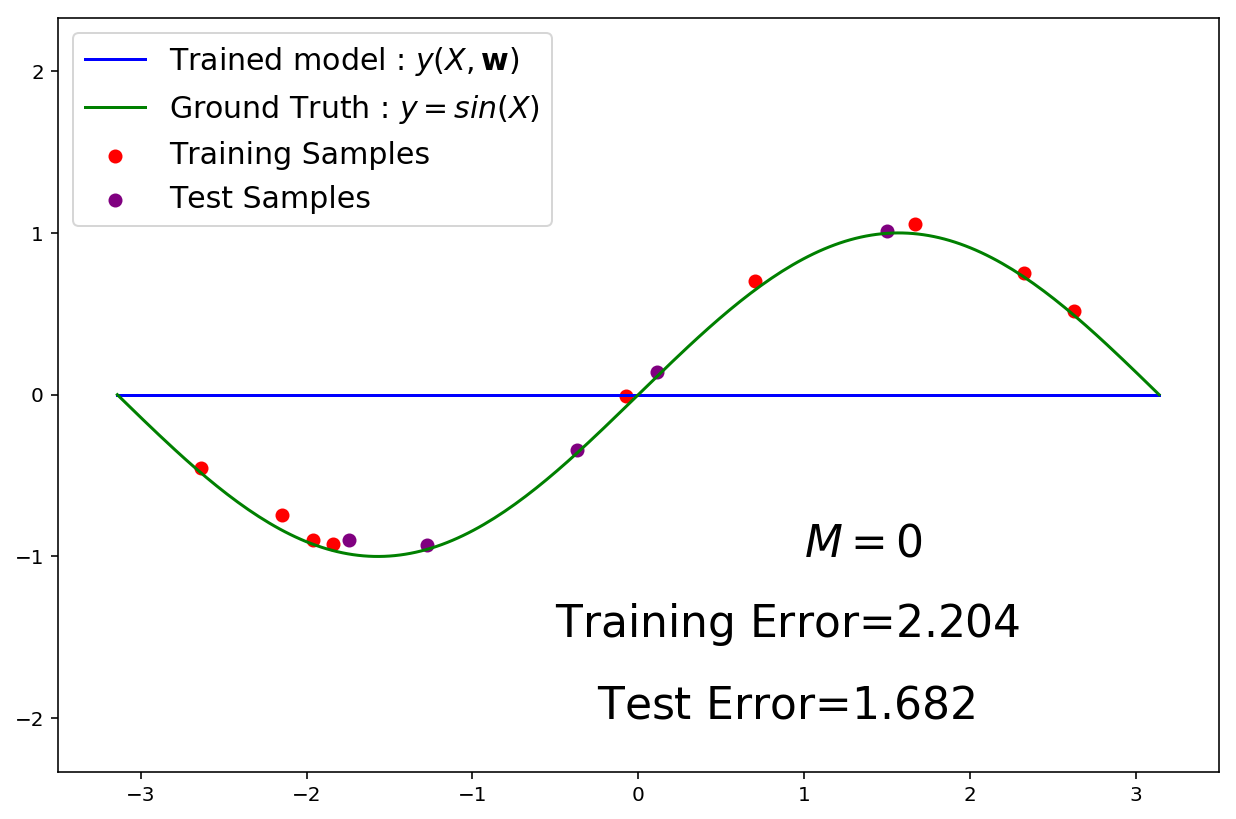

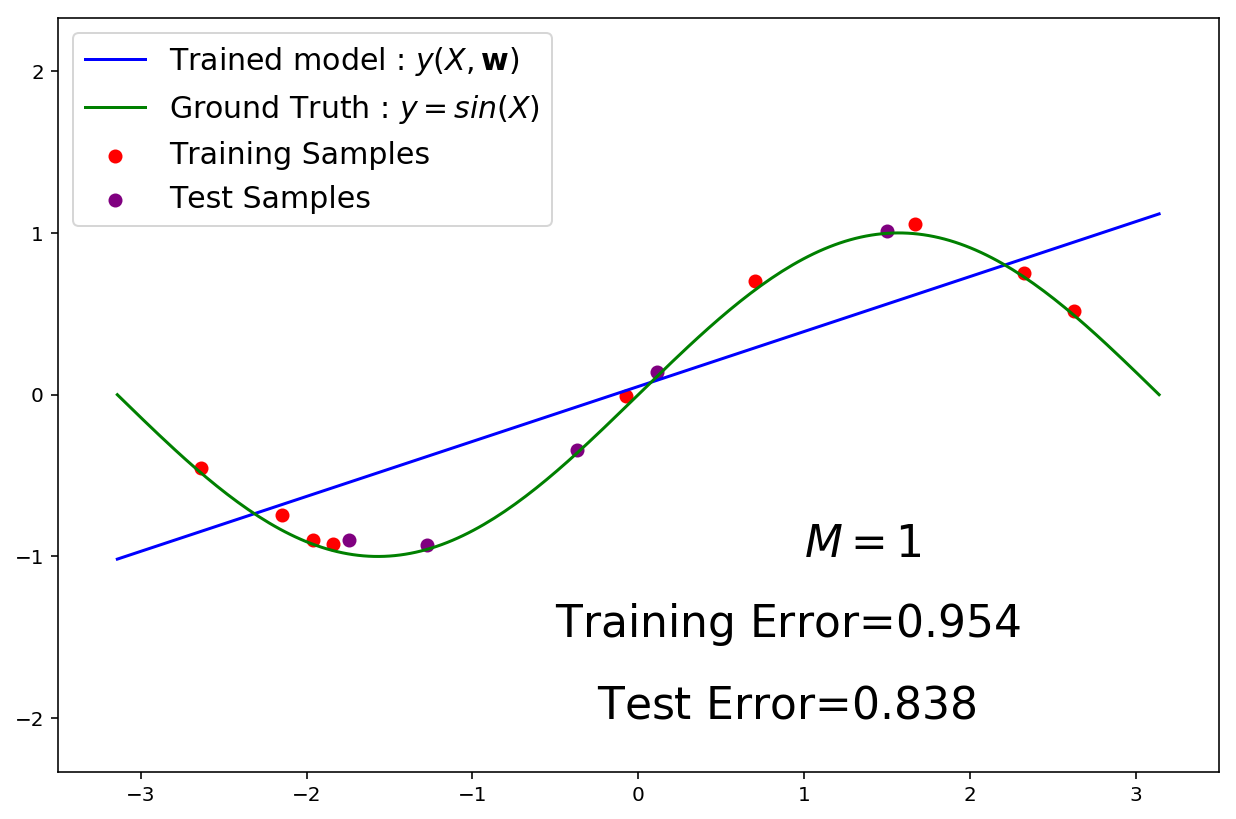

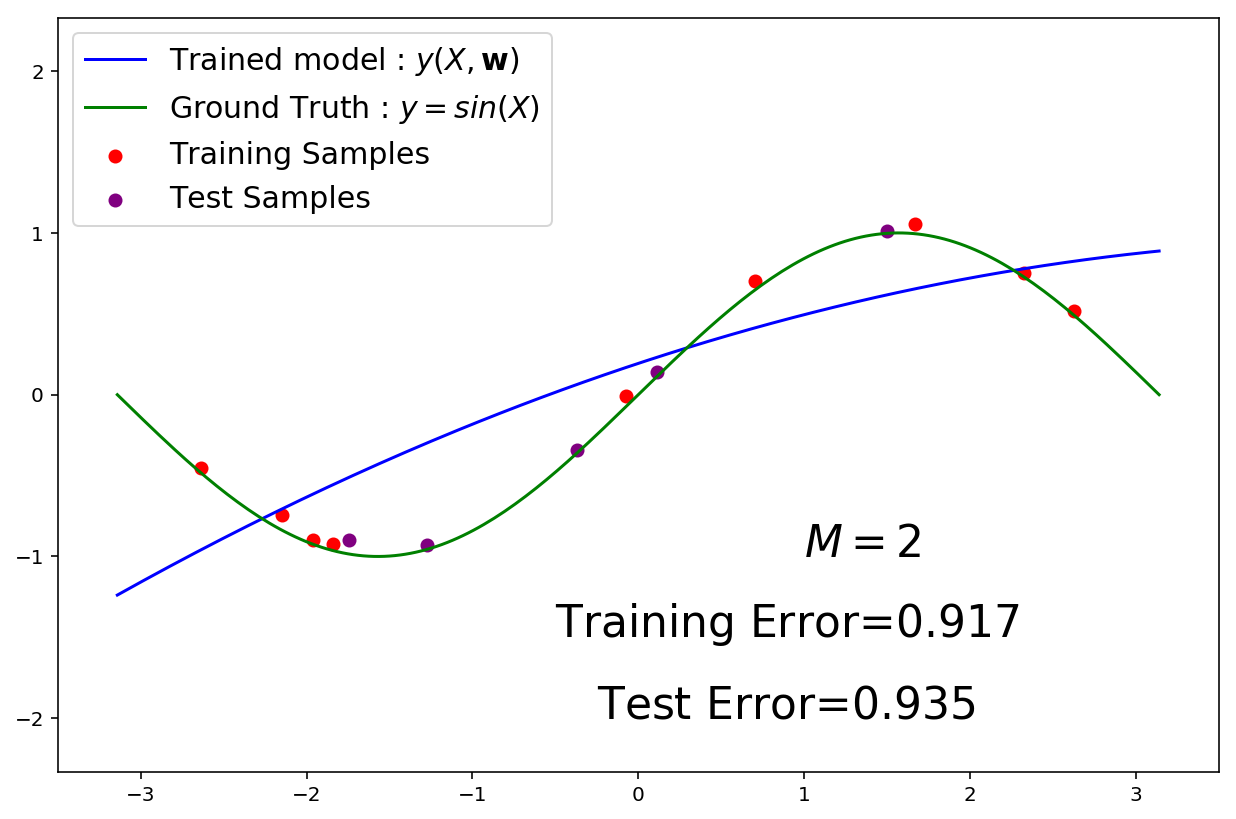

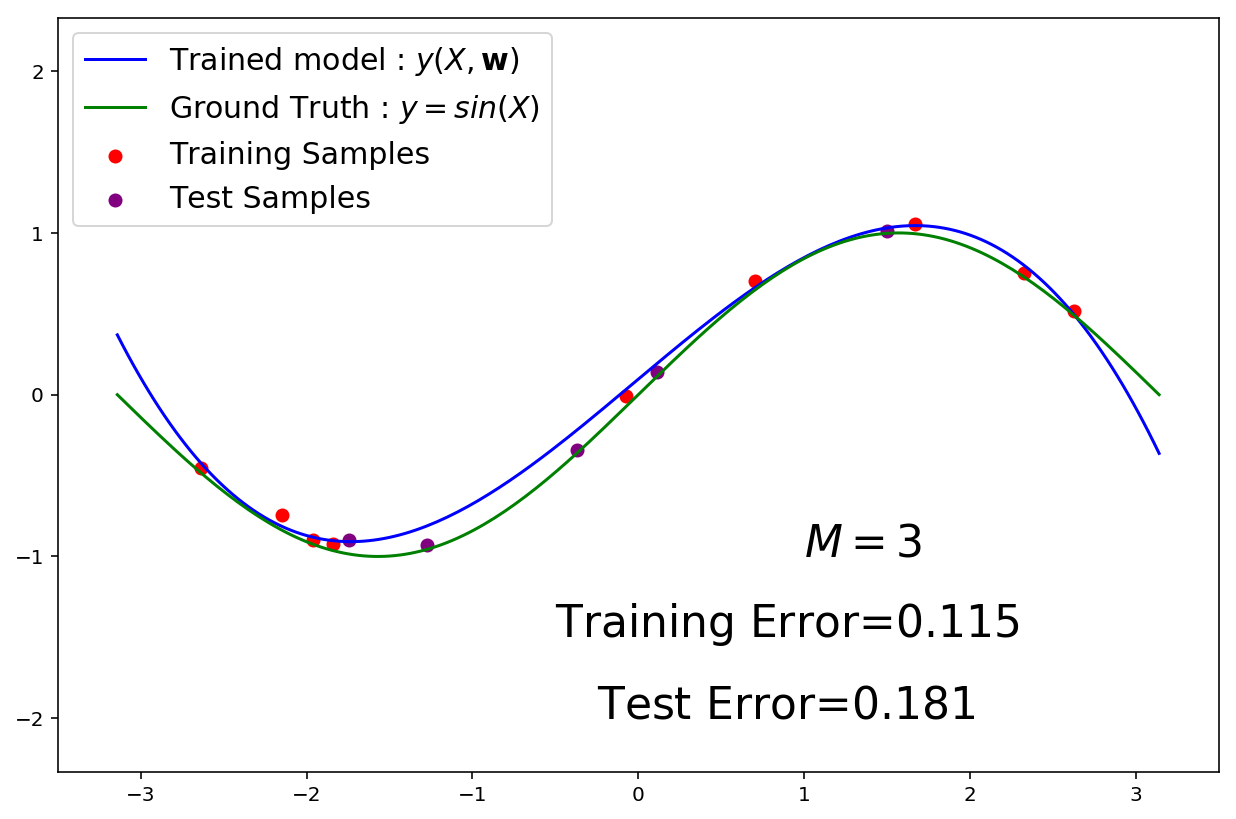

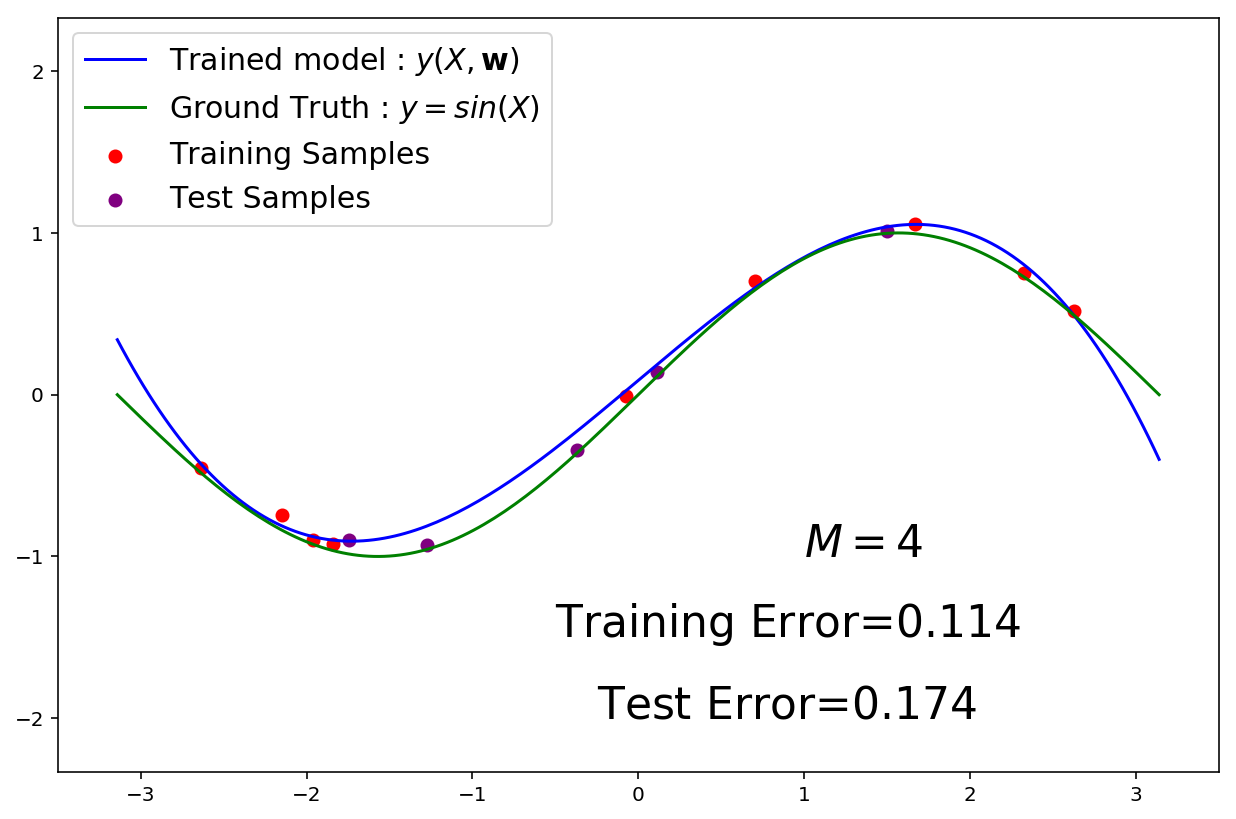

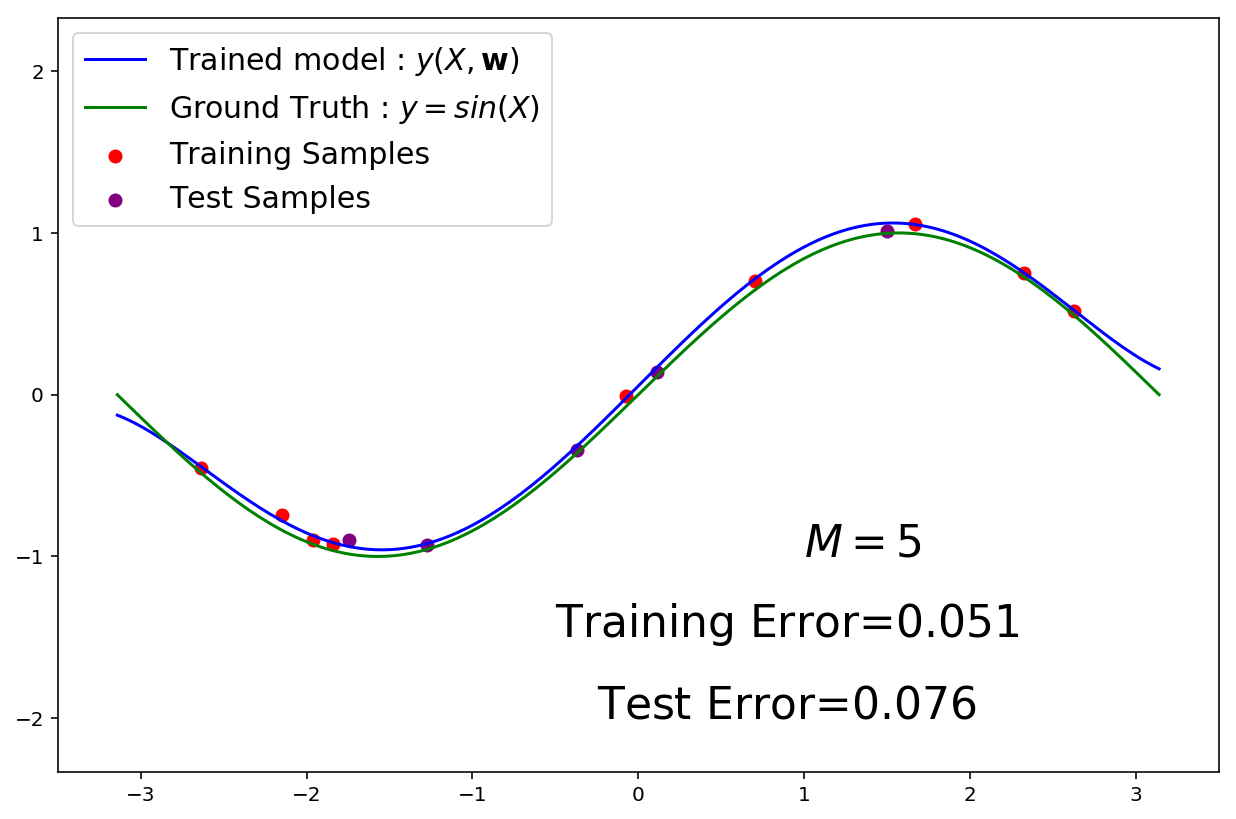

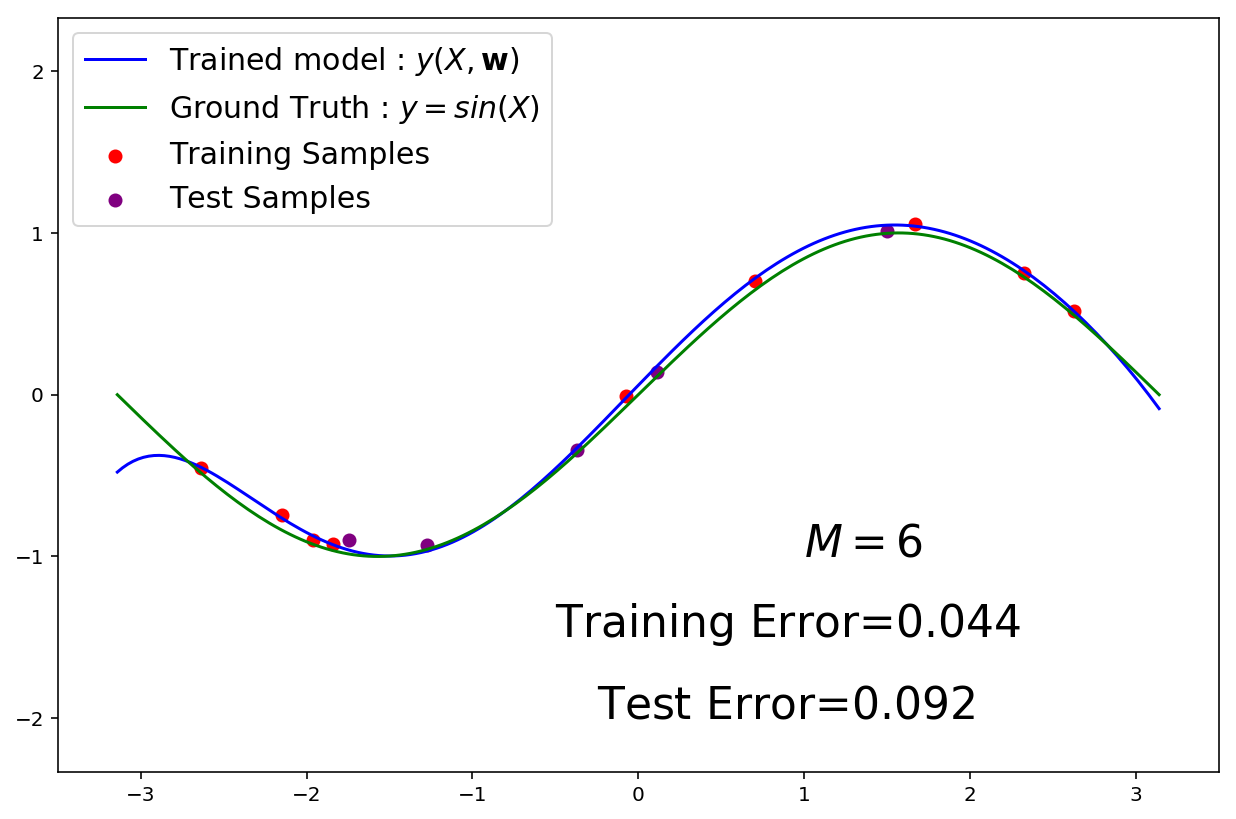

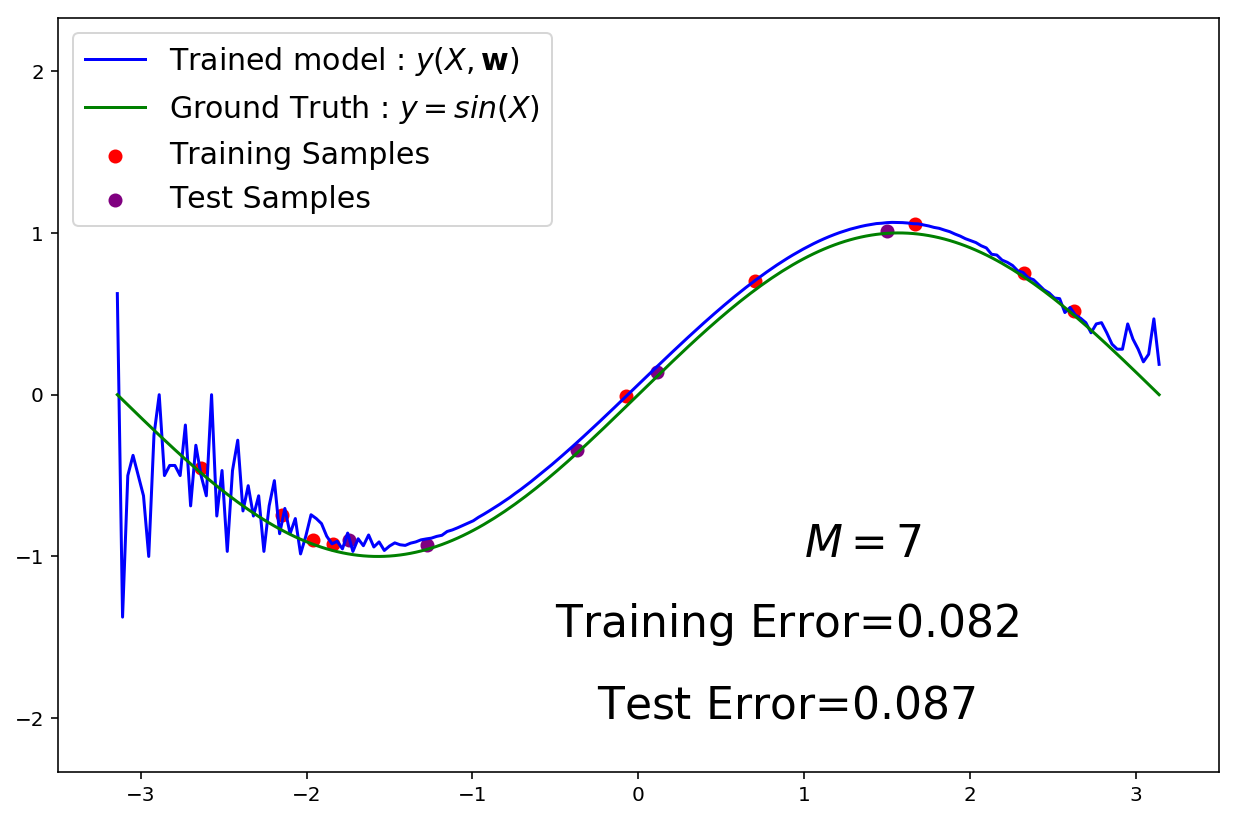

In [7]:
errors_train = [] 
errors_test = []

M_max = X_train.shape[0] -1

for m in range(M_max):
    clf = KernelRidge(degree=m, kernel='poly', alpha=0)
    clf.fit(X_train, y_train)
    error_train = LA.norm(clf.predict(X_train)-y_train, 'fro')
    errors_train.append(error_train)
    error_test = LA.norm(clf.predict(X_test)-y_test, 'fro')
    errors_test.append(error_test)
    
    plt.figure(figsize=(16*scale_factor,10.667*scale_factor))
    plt.axis([-3.5,3.5,-2.33,2.33])
    plt.plot(x_i, clf.predict(x_i), c='blue', label='Trained model : $y(X,\mathbf{w})$')
    plt.plot(x_i, y_i, c='green', label='Ground Truth : $y=sin(X)$')
    plt.scatter(X_train, y_train, c='red', label='Training Samples')
    plt.scatter(X_test, y_test, c='purple', label='Test Samples')
    plt.text(1,-1,'$M={}$'.format(m),fontsize=22)
    plt.text(-0.5,-1.5,'Training Error=${0:.3f}$'.format(error_train), fontsize=22)
    plt.text(-0.25,-2.0,'Test Error=${0:.3f}$'.format(error_test), fontsize=22)
    plt.legend(loc="upper left", fontsize=15)

(0.01, 5)

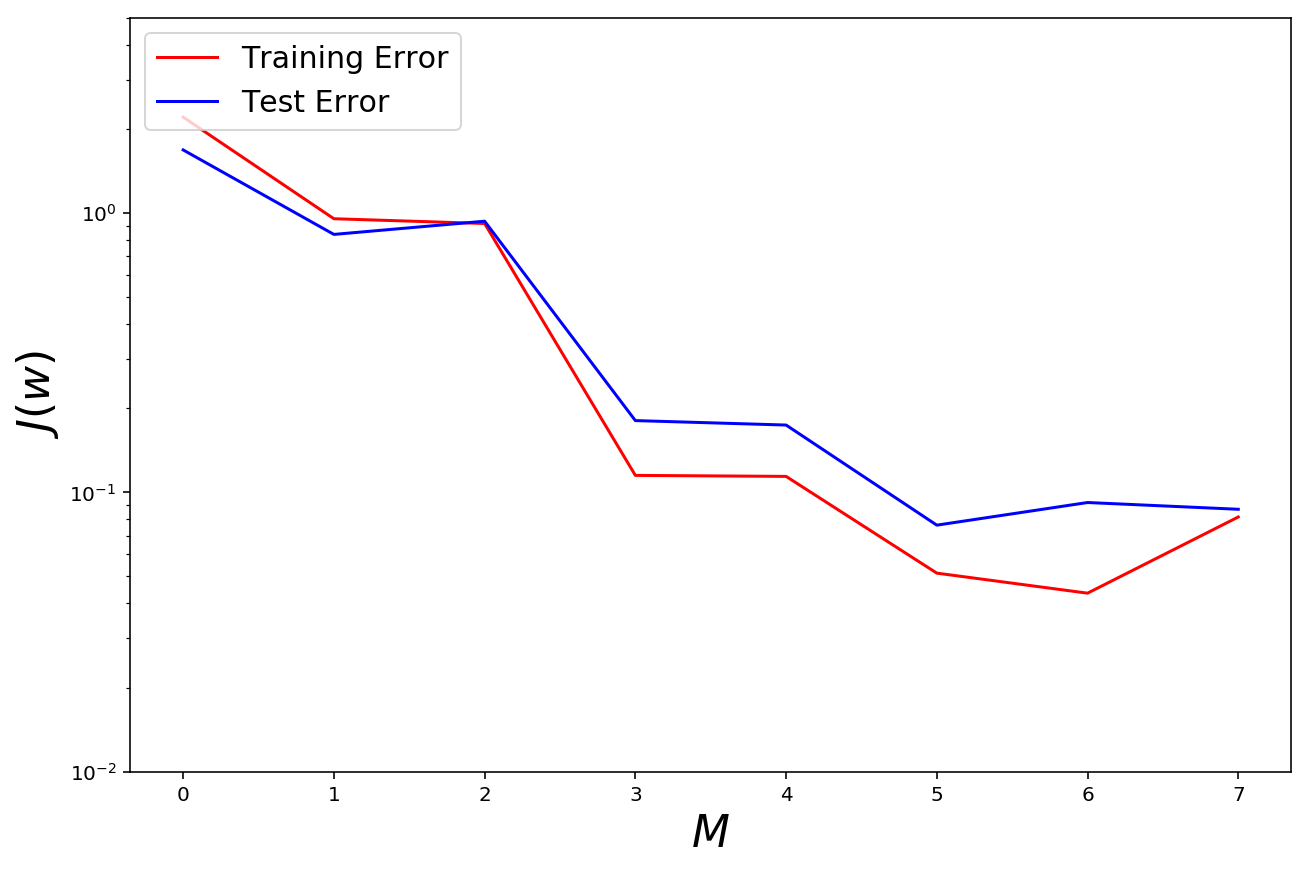

In [8]:
x_m = [i for i in range(len(errors_train))]

plt.figure(figsize=(16*scale_factor,10.667*scale_factor))
plt.plot(x_m, errors_train, c='red', label='Training Error')
plt.plot(x_m, errors_test, c='blue', label='Test Error')
plt.legend(loc="upper left", fontsize=15)
plt.yscale('log')
plt.xlabel('$M$', fontsize=22)
plt.ylabel('$J(w)$', fontsize=22)
plt.ylim(0.01,5)

## Regularisation

$$ J(w,\lambda)= \sum_i (y(x_{i},\mathbf{w}) - y_i)^2 + \lambda||\mathbf{w}||^{2}$$

$$ \lambda\in[0,1)$$

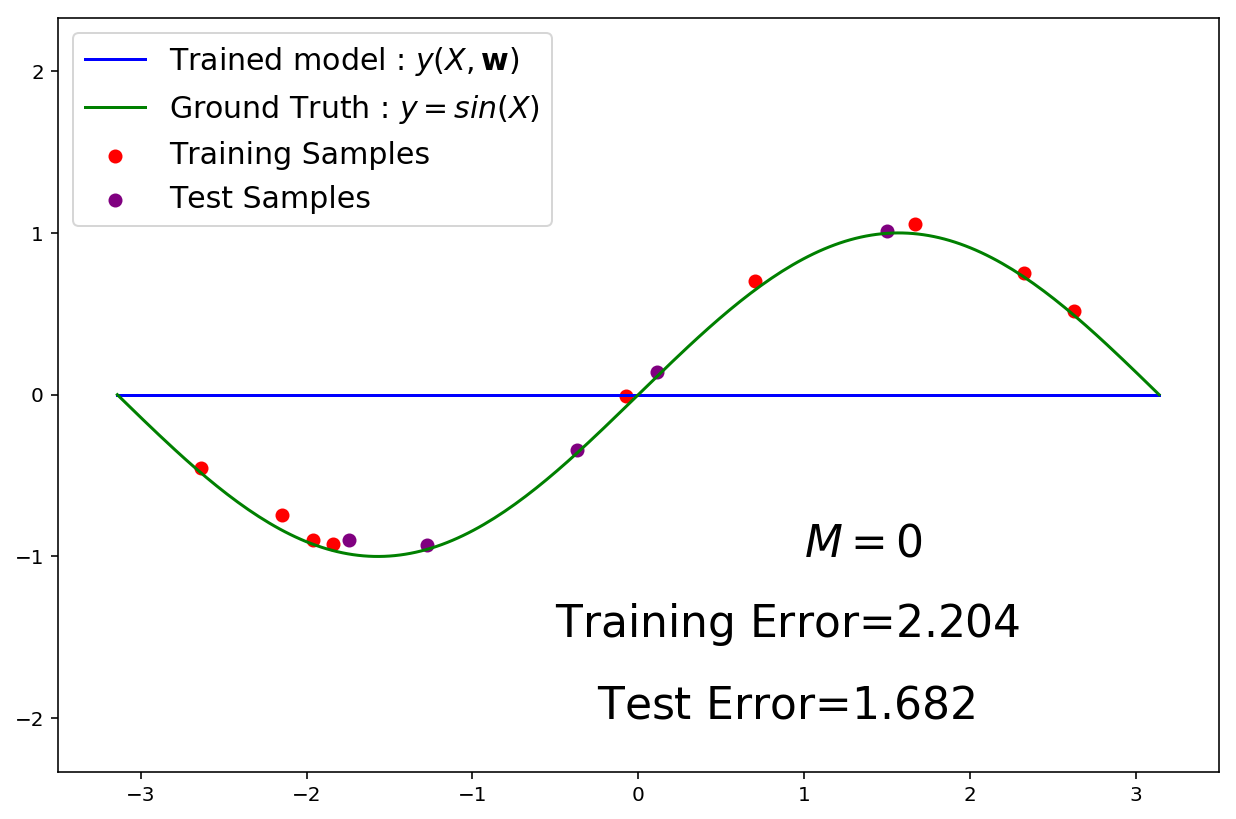

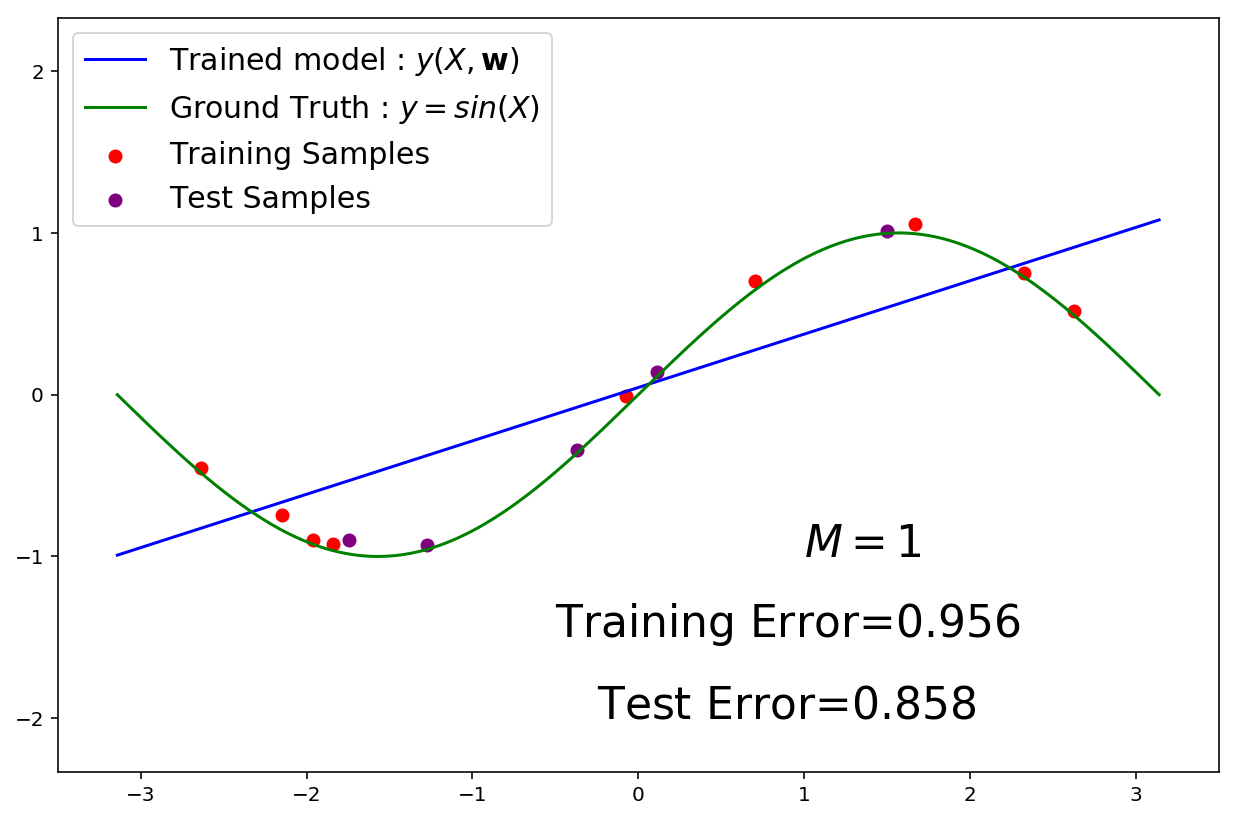

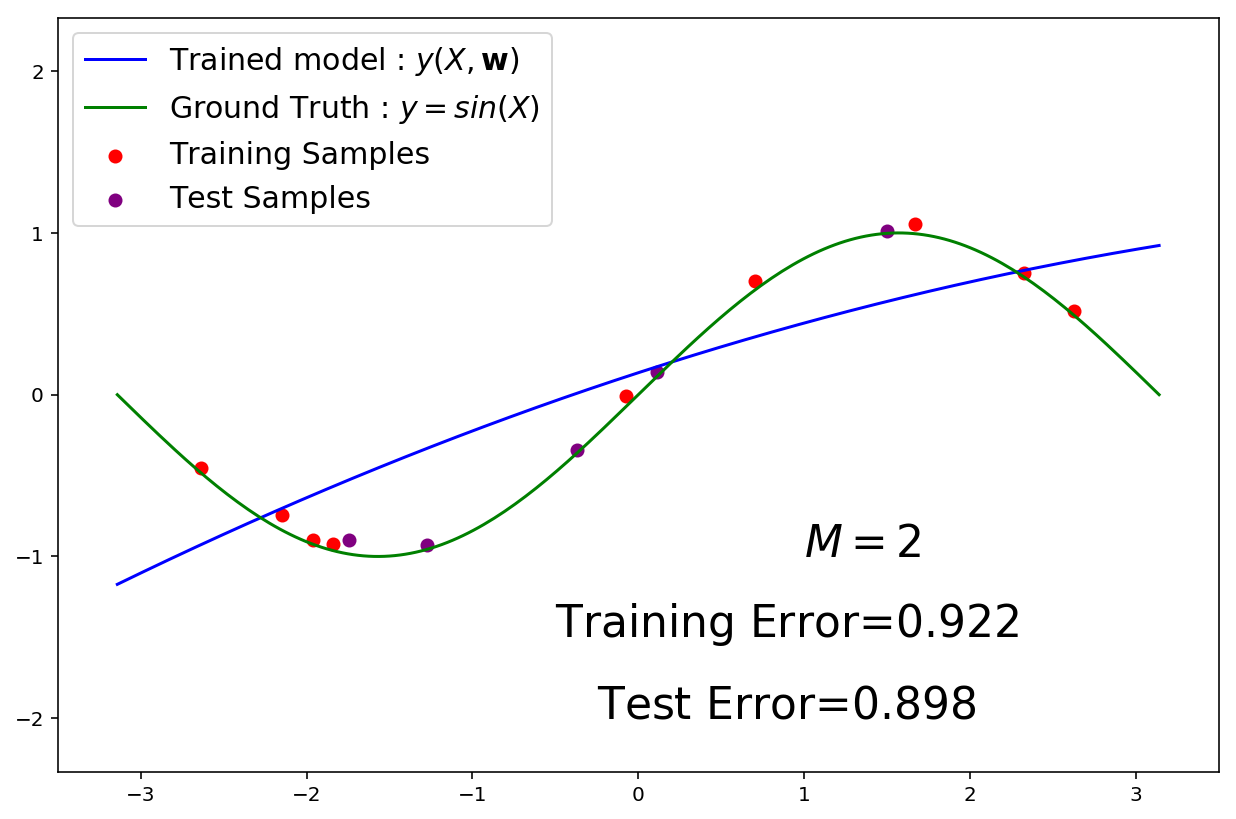

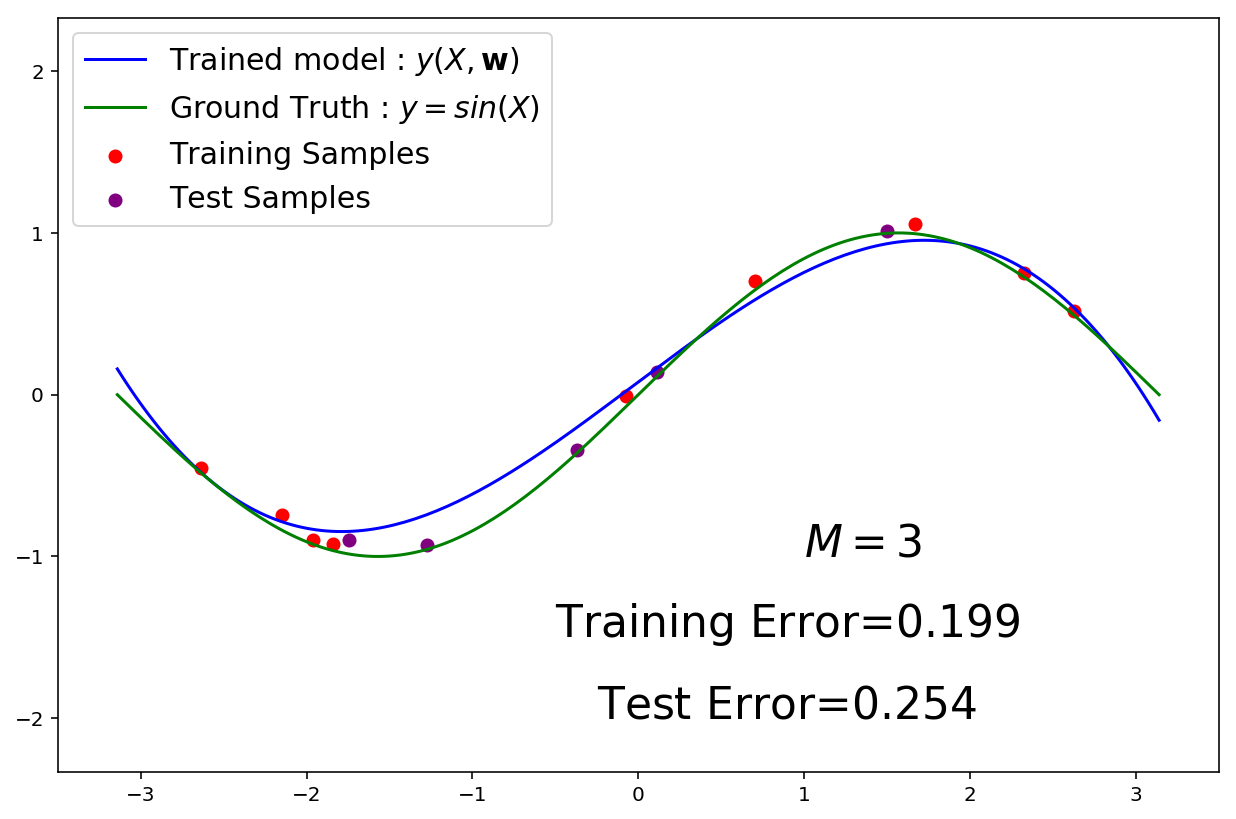

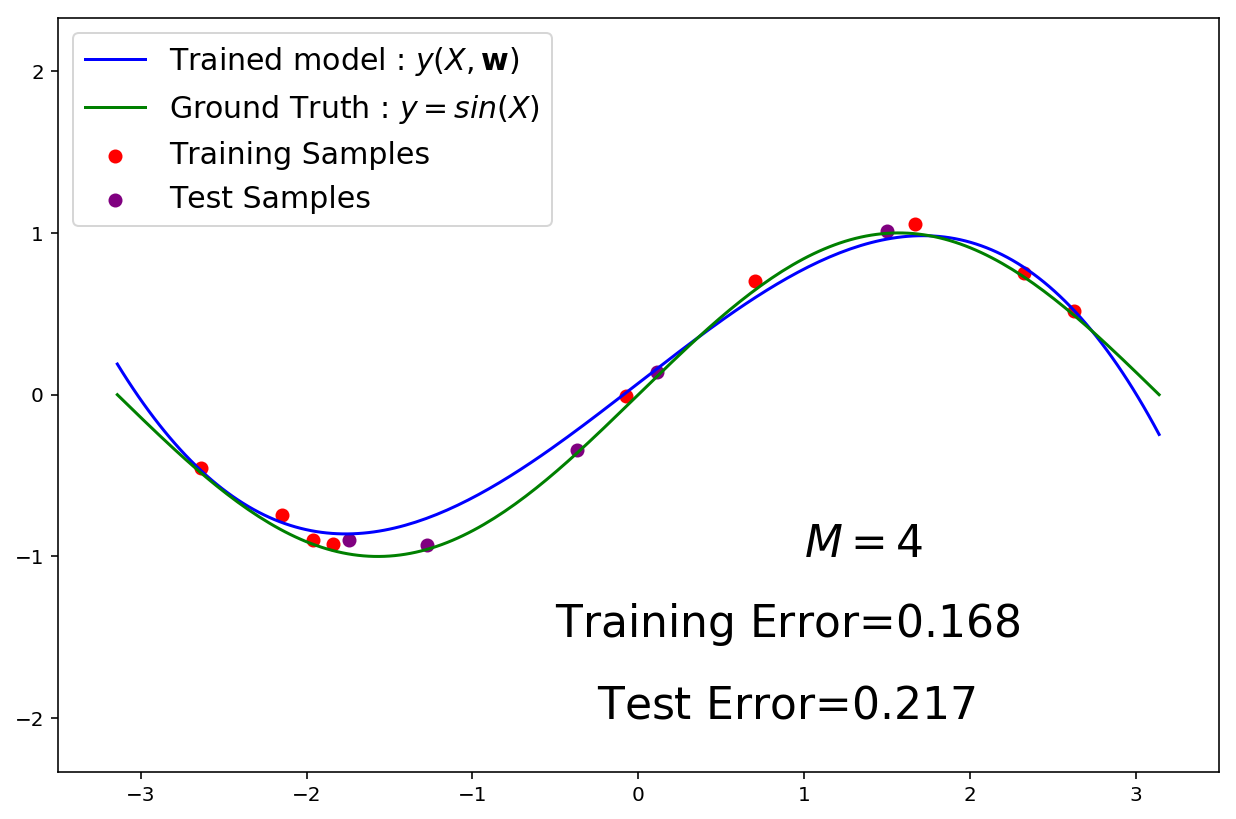

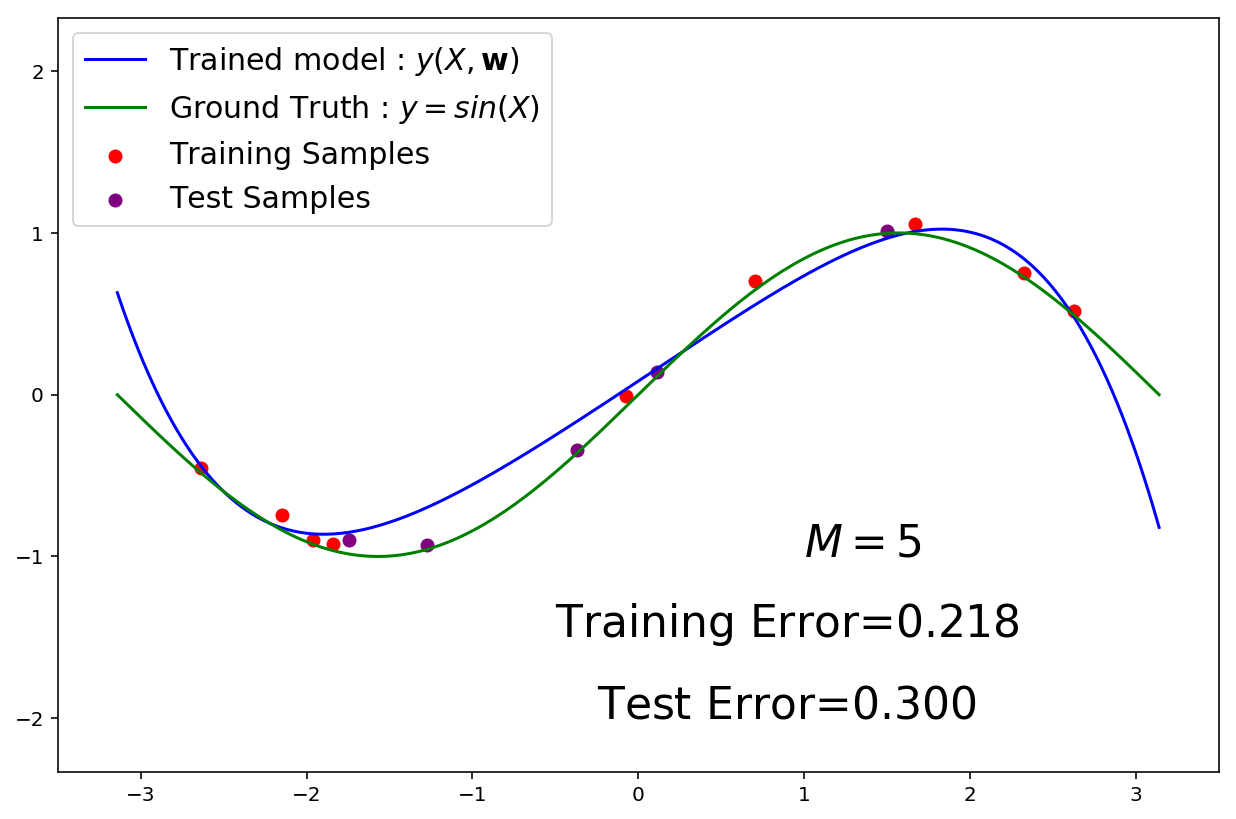

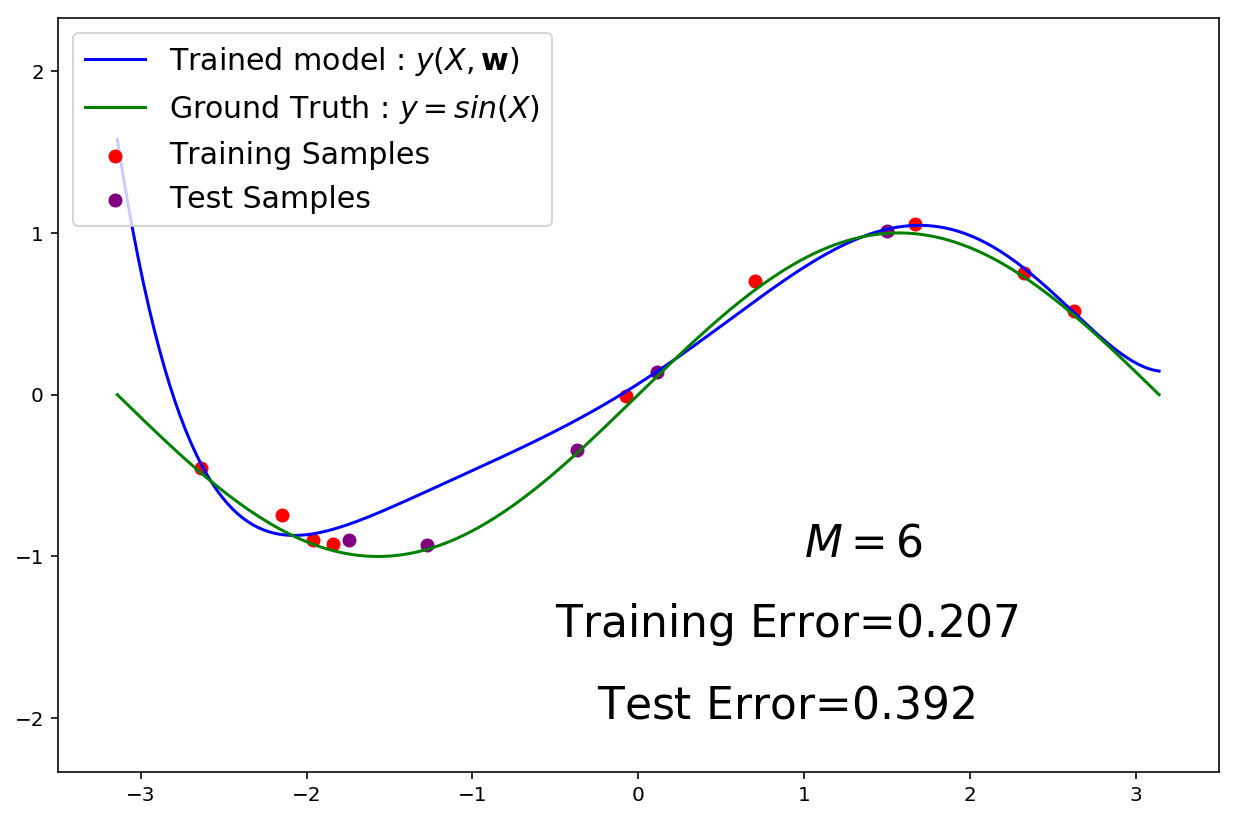

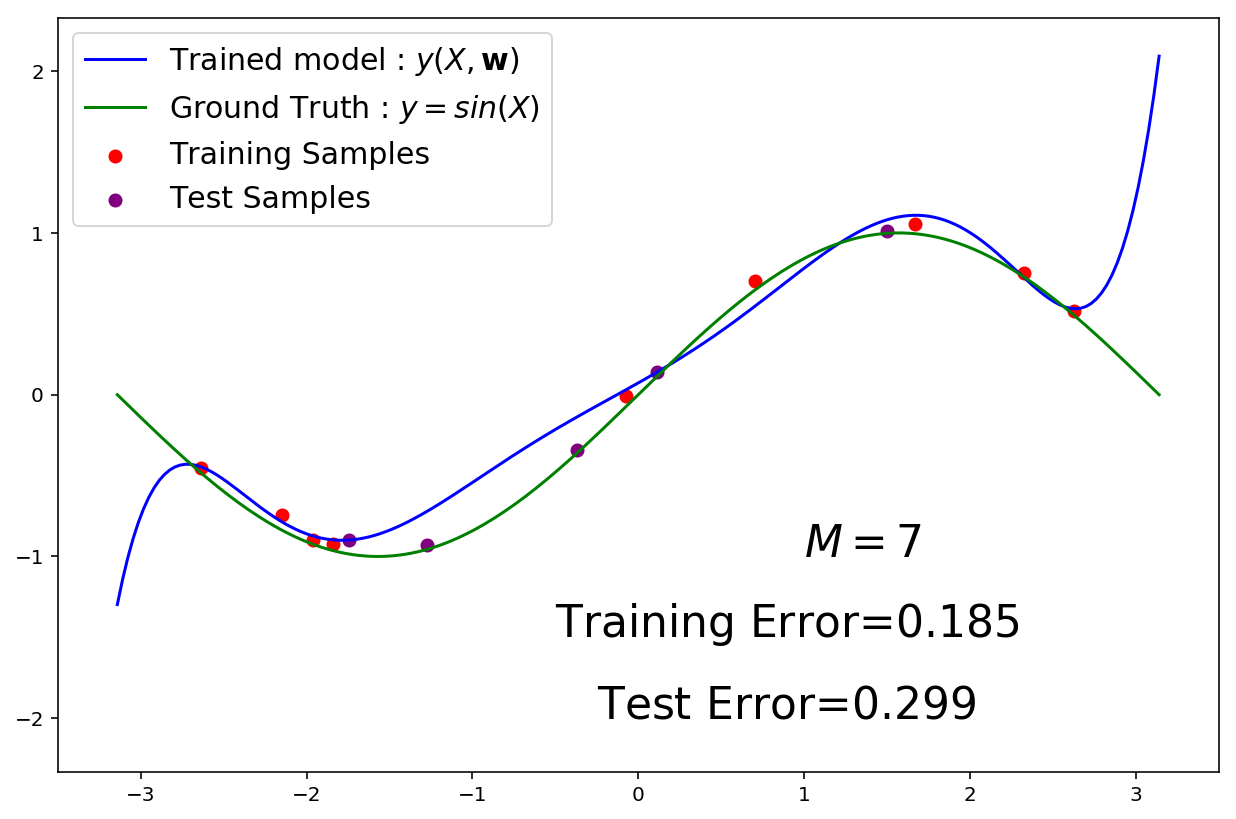

In [9]:
errors_train_reg = [] 
errors_test_reg = []

for m in range(M_max):
    clf = KernelRidge(degree=m, kernel='poly', alpha=1)
    clf.fit(X_train, y_train)
    error_train = LA.norm(clf.predict(X_train)-y_train, 'fro')
    errors_train_reg.append(error_train)
    error_test = LA.norm(clf.predict(X_test)-y_test, 'fro')
    errors_test_reg.append(error_test)
    
    plt.figure(figsize=(16*scale_factor,10.667*scale_factor))
    plt.axis([-3.5,3.5,-2.33,2.33])
    plt.plot(x_i, clf.predict(x_i), c='blue', label='Trained model : $y(X,\mathbf{w})$')
    plt.plot(x_i, y_i, c='green', label='Ground Truth : $y=sin(X)$')
    plt.scatter(X_train, y_train, c='red', label='Training Samples')
    plt.scatter(X_test, y_test, c='purple', label='Test Samples')
    plt.text(1,-1,'$M={}$'.format(m),fontsize=22)
    plt.text(-0.5,-1.5,'Training Error=${0:.3f}$'.format(error_train), fontsize=22)
    plt.text(-0.25,-2.0,'Test Error=${0:.3f}$'.format(error_test), fontsize=22)
    plt.legend(loc="upper left", fontsize=15)

(0.01, 5)

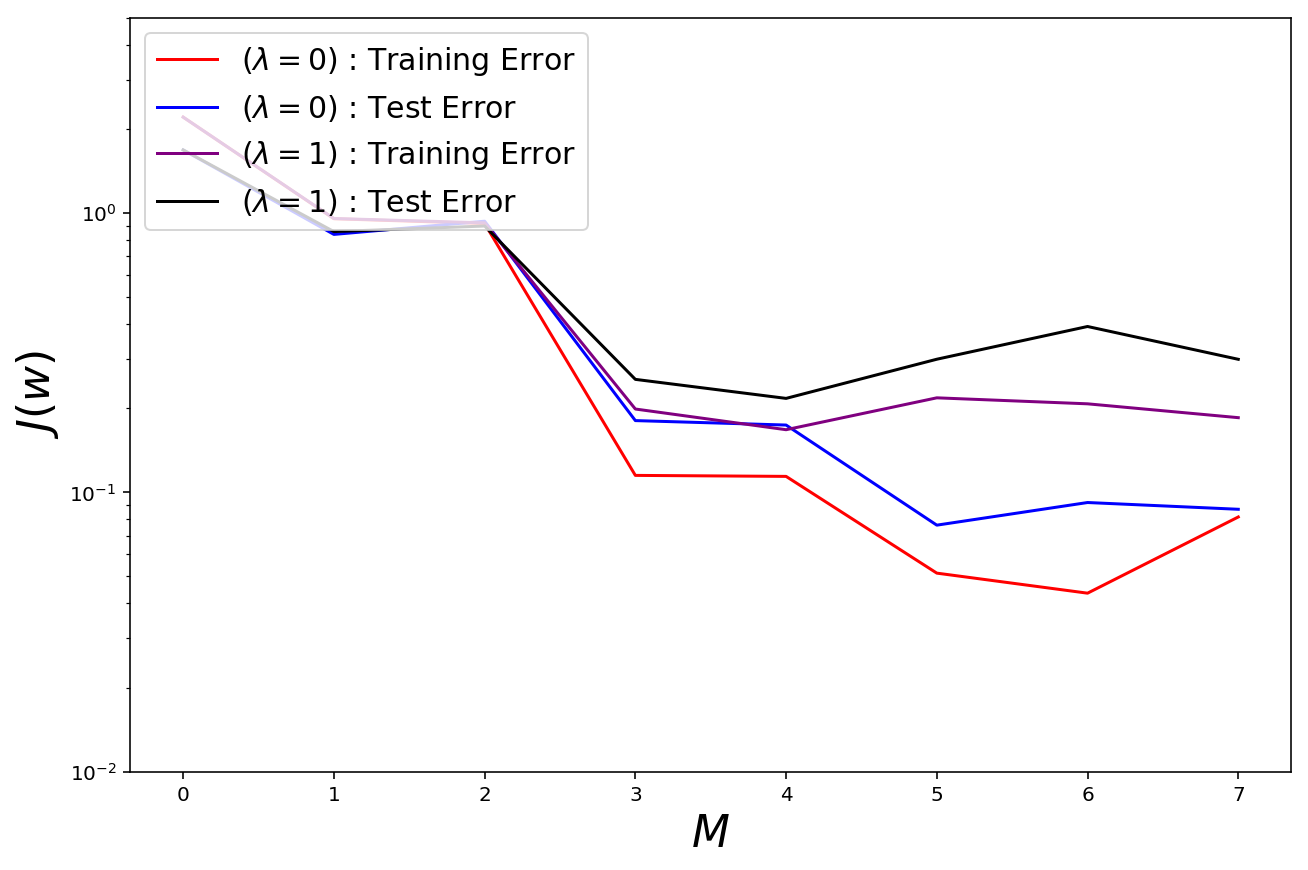

In [10]:
x_m = [i for i in range(len(errors_train))]

plt.figure(figsize=(16*scale_factor,10.667*scale_factor))
plt.plot(x_m, errors_train, c='red', label='$(\lambda=0)$ : Training Error')
plt.plot(x_m, errors_test, c='blue', label='$(\lambda=0)$ : Test Error')
plt.plot(x_m, errors_train_reg, c='purple', label='$(\lambda=1)$ : Training Error')
plt.plot(x_m, errors_test_reg, c='black', label='$(\lambda=1)$ : Test Error')
plt.legend(loc="upper left", fontsize=15)
plt.yscale('log')
plt.xlabel('$M$', fontsize=22)
plt.ylabel('$J(w)$', fontsize=22)
plt.ylim(0.01,5)

In [11]:
print('(No regularization, λ=0) M = {}'.format(np.argmin(errors_train)))

(No regularization, λ=0) M = 6


In [12]:
print('(Regularization, λ=1) M = {}'.format(np.argmin(errors_train_reg)))

(Regularization, λ=1) M = 4
